This is the code for the third part, where we chose to make decisions via fuzzy logic. For our unfortunate choice, for more flowless worklflow, we had to switch from using Matlab. Our main models looked like this:

![Alt text](image.png)

![Alt text](image-1.png)

Where under the functions sum under 0.52 produces different reactions(Hard_Brake,Honk,Warning,Not Acting). In a simpler fashion we tried to implement something simular with python libs.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


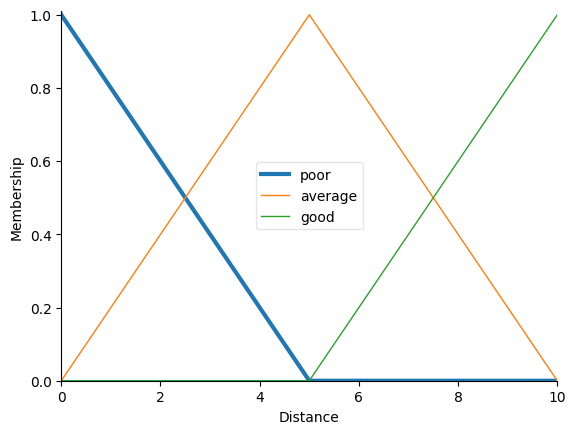

In [312]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
Distance = ctrl.Antecedent(np.arange(0, 11, 1), 'Distance')
Speed_of_Vehicle = ctrl.Antecedent(np.arange(0, 11, 1), 'Speed_of_Vehicle')
Speed_of_Object = ctrl.Antecedent(np.arange(0, 11, 1), 'Speed_of_Object')
Output = ctrl.Consequent(np.arange(0, 11, 1), 'Choice')




# Auto-membership function population is possible with .automf(3, 5, or 7)
Distance.automf(3)
Speed_of_Vehicle.automf(3)
Speed_of_Object.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
Output['Hard_Brake'] = fuzz.trimf(Output.universe, [0, 1, 3])
Output['Honk'] = fuzz.trimf(Output.universe, [1, 2, 3])
Output['Warning'] = fuzz.trimf(Output.universe, [4, 4, 5])
Output['Nothing'] = fuzz.trimf(Output.universe, [5, 6, 6])

Distance['poor'].view()

Giving Fuzzy Rules

(<Figure size 640x480 with 1 Axes>, <Axes: >)

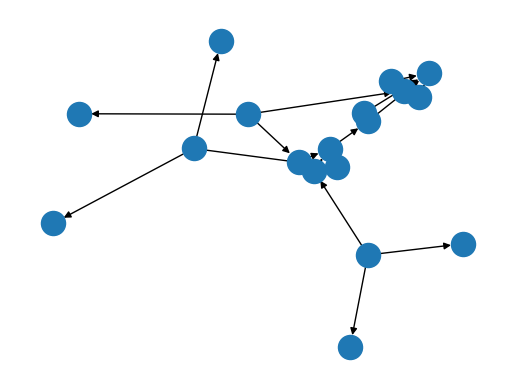

In [313]:
rule1 = ctrl.Rule(Distance['poor'] & Speed_of_Vehicle['good'], Output['Hard_Brake'])
rule3 = ctrl.Rule(Distance['good'] | Speed_of_Vehicle['average'] & Speed_of_Object['average'],  Output['Nothing'])
rule4 = ctrl.Rule(Distance['average'] | Speed_of_Vehicle['good'] & Speed_of_Object['good'],  Output['Warning'])
rule2 = ctrl.Rule(Distance['poor'] | Speed_of_Vehicle['good'] & Speed_of_Object['good'], Output['Hard_Brake'])
rule5 = ctrl.Rule(Distance['poor'] | Speed_of_Object['good'] | Speed_of_Vehicle['good'], Output['Honk'])
#rule6 = ctrl.Rule(Distance['poor'] & Speed_of_Object['average'] & Speed_of_Vehicle['average'], Output['Nothing'])



rule3.view()

Choice Control:


In [314]:
c_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5])

In [315]:
Sim = ctrl.ControlSystemSimulation(c_ctrl)

6.0


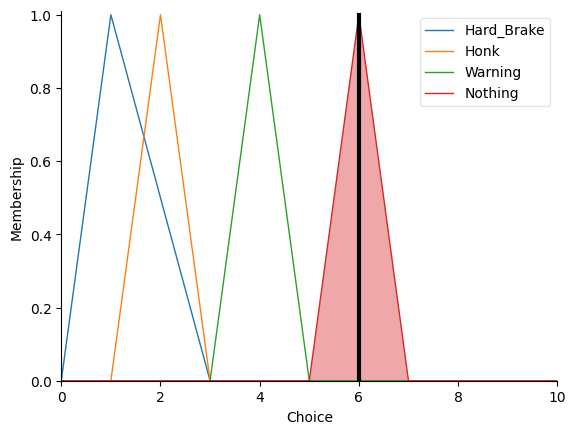

In [320]:
#for _ in data:

Sim.input['Distance'] = 10
Sim.input['Speed_of_Object'] = 1
Sim.input['Speed_of_Vehicle'] = 1

Sim.compute()



print(Sim.output['Choice'])
Output.view(sim=Sim)


1.9224242424242421


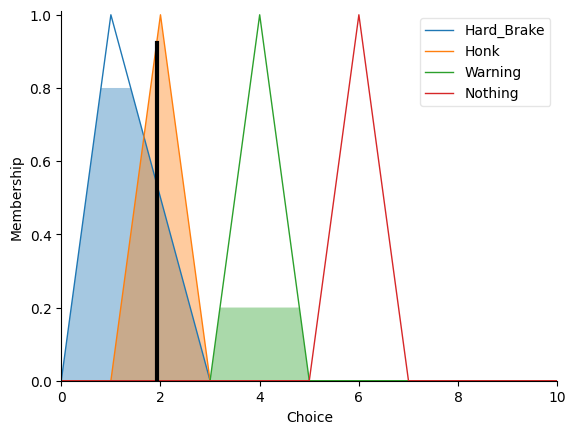

In [322]:
Sim.input['Distance'] = 1
Sim.input['Speed_of_Object'] = 10
Sim.input['Speed_of_Vehicle'] = 1

Sim.compute()



print(Sim.output['Choice'])
Output.view(sim=Sim)

6.0


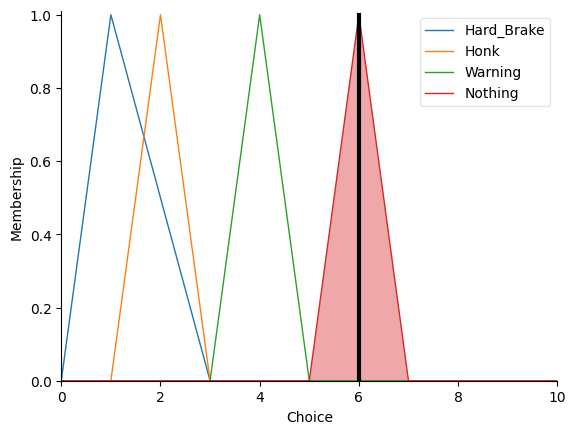

In [324]:
Sim.input['Distance'] = 10
Sim.input['Speed_of_Object'] = 3
Sim.input['Speed_of_Vehicle'] = 3

Sim.compute()



print(Sim.output['Choice'])
Output.view(sim=Sim)